In [12]:
### implementation in 2D
import math, random

def print_points(P):
    """
    outputs coordinates in a readable fashion
    """
    for p in P:
        print(f'{p[0]};{p[1]}')

def generate_points(N):
    """
    generates set of N vertices
    """
    # empty list to store set of vertices
    points = []
    
    # empty list to store vertex
    p = []
    
    # randomly generate vertices
    for i in range(0, N):
        p.append(random.randint(-20,20))
        p.append(random.randint(-20,20))
        points.append(p)
        p = []

    return points


def find_initial_line(S):
    """
    identifies and returns the coordinates with S that have the min
    and max X value. This establishes the initial oriented hyperplane
    through S.
    """
    # Finding the coordinate with minimum x-value
    min_x = min(S, key=lambda x: x[0])
    max_x = max(S, key=lambda x: x[0])
        
    return min_x,max_x # pair of coordinates with greatest distance


def seg_divide(points, P1, P2):
    """
    creates two new segments seperated by P1 and P2 by calculating the
    signed distances for all points in the segment. Points with + signed distance
    are above the line, - signed distances are below the line.
    args(segment, line start coordinate, line end coordinate)
    """

    # calculates signed distance between point and line
    def point_side(point, line_P1, line_P2):
        return ((line_P2[0] - line_P1[0]) * (point[1] - line_P1[1]) - 
                (line_P2[1] - line_P1[1]) * (point[0] - line_P1[0]))
    
    S1 = [] # points above line
    S2 = [] # points below line
    for p in points: # for each point in the segment
        d = point_side(p, P1, P2) # calculate the signed distance from line
        if d > 0:
            S1.append(p)
        if d < 0:
            S2.append(p)
        # if d == 0, point is on line, thus, not on convex hull
    return S1, S2



def quickhull(S):
    """
    executes the quickhull
    """
    
    # if S is a triangle, return convex hull
    if len(S) < 3:
        return S
    
    # instantiate set to store convex hull vertices
    convex_hull = []
    
    # find starting vertices with min and max X values
    p1,p2 = find_initial_line(S)   

    # add initial vertices p1,p2 to convex hull set
    convex_hull.append(p1)
    convex_hull.append(p2)

    # divide S into 2 segments
    s1,s2 = seg_divide(S, p1, p2)

    # call findHull on s1, s2
    convex_hull.extend(find_hull(s1, p1, p2))
    convex_hull.extend(find_hull(s2, p2, p1))
    
    return convex_hull # returns the set of vertices that create the convex hull
    
    
def find_hull(S, A, B):
    """
    recursive function that calculates extreme vertex C from the line AB
    such that a traingle ACB is created, with C being appended to hull_points array.
    4 new segments are created, 2 about AC, 2 about CB.
    The outer segments of the 4 created are then explored for more extreme
    vertices. Hull_points is recursively called on the new outer segments.
    """
    
    # base case
    if len(S) < 3:
        return []
    
    # find extreme point from line
    C = max(S, key=lambda point: abs(
        (B[0] - A[0]) * (point[1] - A[1]) - (B[1] - A[1]) * (point[0] - A[0])
    ))
    
    # append extreme points C to hull_points array
    hull_points = [C]

    # create new segments from ACB such that O1 and O2
    # are outer segments for further exploration
    O1,i1 = seg_divide(S,A,C)
    O2,i2 = seg_divide(S,C,B)
    
    
    # if outer segment contains only 1 vertex, it must be an exreme
    # vertex. Thus, append it to hull_points.
    if len(O2) == 1:
        hull_points.append(O2[0])
    if len(O1) == 1:
        hull_points.append(O1[0])
    
    # recursively call find_hull on outer segments
    # using list extensions to append return values
    # in call stack to hull_points
    hull_points.extend(find_hull(O1, A, C))
    hull_points.extend(find_hull(O2, C, B))
    
    return hull_points
    

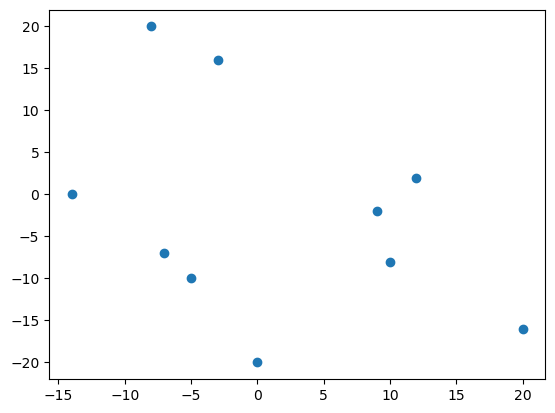

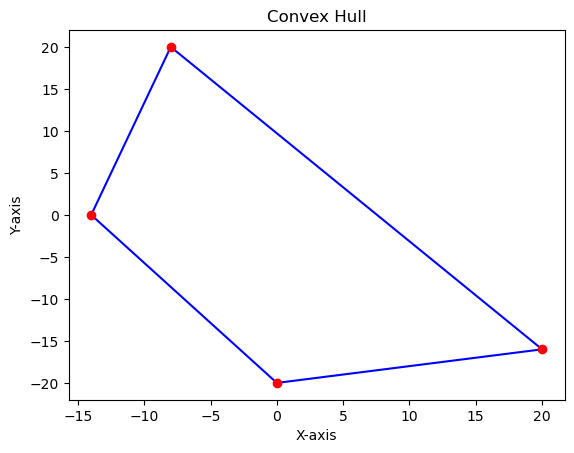

In [13]:
### Visualisation
import matplotlib.pyplot as plt
import numpy as np


D = generate_points(10)

x_points = [p[0] for p in D]
y_points = [p[1] for p in D]

xs = np.array(x_points)
ys = np.array(y_points)

plt.plot(xs,ys, 'o')
plt.show()

# quickhull

hull = quickhull(D)

# find centroid and order each point by it's polar angle from centroid
centroid = [sum(p[0] for p in hull) / len(hull),
            sum(p[1] for p in hull) / len(hull)]

hull.sort(key=lambda p: (180 + math.degrees(math.atan2(p[1] - centroid[1], p[0] - centroid[0]))) % 360)

x_hull = [point[0] for point in hull]
y_hull = [point[1] for point in hull]

# Closing the convex hull polygon by appending the starting point
x_hull.append(hull[0][0])
y_hull.append(hull[0][1])

plt.plot(x_hull, y_hull, 'b-')  # Plotting the convex hull

# Plot the points on the convex hull
plt.plot(x_hull[:-1], y_hull[:-1], 'ro')  # Plotting the points in red circles

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Convex Hull')
plt.show()
